<!-- Resources

- https://developmentseed.org/lonboard/latest/ (lonboard)
- https://pygis.io/docs/g_hire.html

 -->

# GIS

Spatial data refers to information that has a geographic or locational component. It encompasses data that describes the physical location and characteristics of objects in space, such as points, lines, polygons, and surfaces. Spatial data is essential for Geographic Information Systems (GIS), which are tools used for capturing, storing, analyzing, and visualizing spatial data to understand patterns, relationships, and trends in the real world.

Python has emerged as a popular programming language for GIS due to its versatility, ease of use, and extensive libraries specifically designed for spatial data analysis and visualization. Python offers powerful tools like GeoPandas, Shapely, Fiona, and Pyproj, which facilitate tasks such as reading, manipulating, and processing spatial data. Additionally, Python's integration with other libraries and frameworks, such as Matplotlib, Pandas, and NumPy, further enhances its capabilities for GIS applications.


In [1]:
# requirementss
%pip install geopandas matplotlib shapely rasterio numpy pandas sklearn-xarray -q
%pip install git+https://github.com/jgrss/geowombat  -q

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.3/22.3 MB 108.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 217.9/217.9 kB 9.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Getting requirements to build wheel ... error
error: subprocess-exited-with-error

× Getting requirements to build wheel did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


## Spatial Data


To work in a GIS environment, real world observations (objects or events that can be recorded in 2D or 3D space) need to be reduced to spatial entities. These spatial entities can be represented in a GIS as a `vector data model` or a `raster data model`.


Below there is the representation of a river in the 2 formats, vector (left) and raster (right)

![](https://pygis.io/_images/vector_vs_raster.jpg)

### Vector Data

Vector features can be decomposed into three different geometric primitives: `points`, `polylines` and `polygons`.

For each of these examples, we’ll be using a Python dictionary to form the basis of a GeoDataFrame. A dictionary in Python is a data structure that allows you to store data as pairs of keys and values.


#### Point

We can use the geopandas and shapely libraries to create a GeoDataFrame that contains point data.

A point is composed of one coordinate pair representing a specific location in a coordinate system. Points are the most basic geometric primitives having no length or area. By definition a point can’t be “seen” since it has no area; but this is not practical if such primitives are to be mapped.

In [9]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

d = {
    "name": [
        "Washington\n(38.90, -77.03)",
        "Baltimore\n(39.29, -76.61)",
        "Fredrick\n(39.41,-77.40)",
    ],
    "geometry": [
        Point(-77.036873, 38.907192),
        Point(
            -76.612190,
            39.290386,
        ),
        Point(-77.408456, 39.412006),
    ],
}

gdf = gpd.GeoDataFrame(d, crs="EPSG:4326")
print(gdf)

                          name                    geometry
0  Washington\n(38.90, -77.03)  POINT (-77.03687 38.90719)
1   Baltimore\n(39.29, -76.61)  POINT (-76.61219 39.29039)
2     Fredrick\n(39.41,-77.40)  POINT (-77.40846 39.41201)


We can use `matplotlib` to plot our `GeoDataFrame`

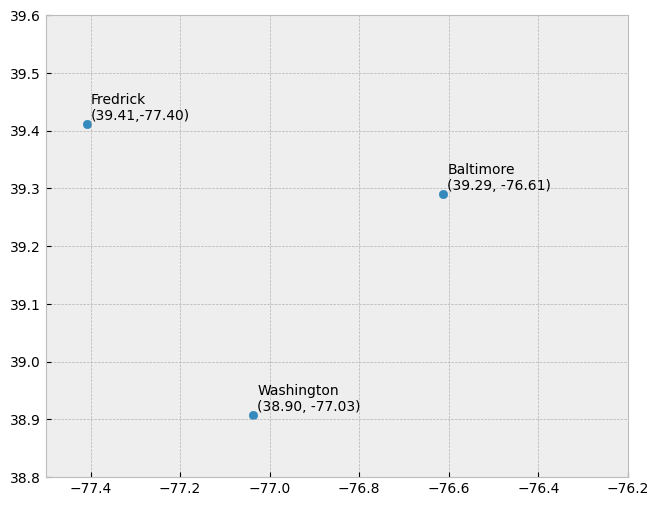

In [10]:
plt.style.use('bmh') # better for plotting geometries vs general plots.

fig, ax = plt.subplots(figsize=(12, 6))
gdf.plot(ax=ax)
plt.ylim([38.8, 39.6])
plt.xlim([-77.5, -76.2])

for x, y, label in zip(gdf.geometry.x, gdf.geometry.y, gdf.name):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points")
plt.show()

#### Line String

Linestring is composed of a sequence of two or more coordinate pairs called vertices. A vertex is defined by coordinate pairs, just like a point, but what differentiates a vertex from a point is its explicitly defined relationship with neighboring vertices.


We can create a GeoDataFrame like a `GeoJson`

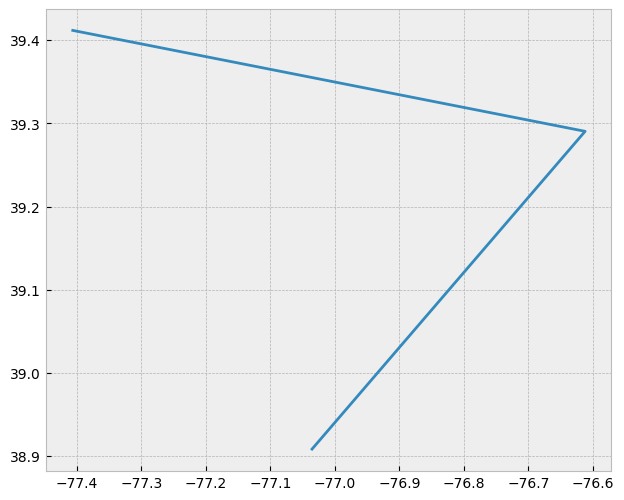

In [11]:
# Import required modules
from shapely.geometry import LineString, Point
import geopandas as gpd
import matplotlib.pyplot as plt

# Define a dictionary with names and geometry (LineString)
d = {
    "name": ["Washington\n(38.90, -77.03)"],
    "geometry": [
        LineString(
            [
                Point(-77.036873, 38.907192),
                Point(
                    -76.612190,
                    39.290386,
                ),
                Point(-77.408456, 39.412006),
            ]
        )
    ],
}

# Create a GeoDataFrame using the dictionary
gdf = gpd.GeoDataFrame(d, crs="EPSG:4326")

# Plot the GeoDataFrame
fig, ax = plt.subplots(figsize=(12, 6))
gdf.plot(ax=ax)
plt.show()

#### Polygon

A polygon, in geographic information systems (GIS), is an area defined by three or more line segments, each with a starting and ending pair of coordinates that match. The terms lattice or area might be used interchangeably with ‘polygon’. A polygon’s defining features include its length (i.e., the perimeter), its area, and the concept of an interior and exterior. Specifically in GIS, the enclosed area of a polygon is explicitly defined.


Note that we explicitly have to call the `Polygon` method in order to create the polygon area, just like in the previous cases.

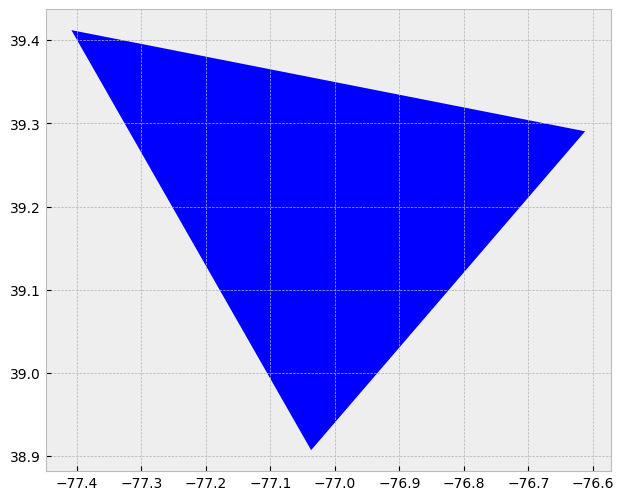

In [12]:
from shapely.geometry import Polygon

d = {
    "name": ["Washington\n(38.90, -77.03)"],
    "geometry": [
        Polygon(
            [
                Point(-77.036873, 38.907192),
                Point(
                    -76.612190,
                    39.290386,
                ),
                Point(-77.408456, 39.412006),
            ]
        )
    ],
}
gdf = gpd.GeoDataFrame(d, crs="EPSG:4326")
fig, ax = plt.subplots(figsize=(12, 6))
gdf.plot(ax=ax)
plt.show()

In other cases we can plot the graph quickly by placing `.plot()` at the end of the GeoDataFrame

<Axes: >

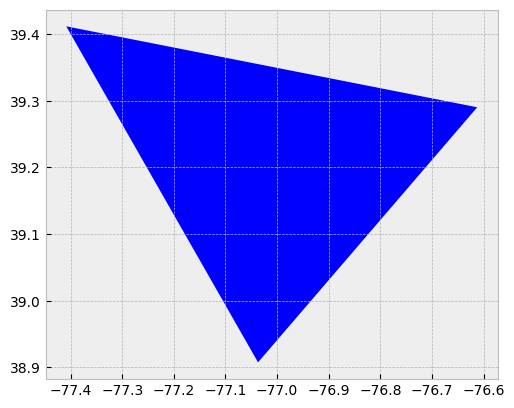

In [13]:
# Native Plot

gdf.plot()

### Raster Data


Raster data models utilize a grid of cells, known as pixels, to depict real-world objects like imagery, surface temperatures, and elevation models. These grids resemble regularly spaced arrays of marked points, with each cell in the grid having its own set of coordinates. Rasters are commonly stored as arrays of values in GIS environments.

A crucial feature of raster data models is that each cell or pixel has an associated value. This stands in contrast to vector models where the geometric primitive may or may not have an associated value.


To show what a raster looks like we can create a 2-dimensional array and show the image.

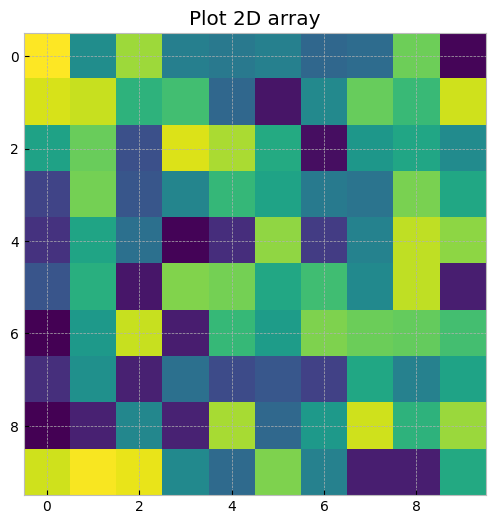

In [14]:
import numpy as np

X=np.random.randint(256, size=(10, 10))

fig = plt.figure(figsize=(8,6))
plt.imshow(X)
plt.title("Plot 2D array")
plt.show()

For a more practical example, we can use the library rasterio to handle geospatial raster data. Rasterio reads and writes geospatial raster datasets, making it an essential tool for raster analysis. The following code reads a raster dataset and then plots it:

To better exemplify we can use the data that is hosted online from the package [`rasterio`](https://github.com/rasterio/rasterio/tree/main)

It’s important to use a context manager (`with` statement) when opening files with Rasterio to ensure they’re properly closed after use.


In [15]:
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt

# Open a web location with a demo raster dataset
# url = 'https://github.com/mapbox/rasterio/raw/master/tests/data/goes.tif' # Original URL
url = 'https://github.com/mapbox/rasterio/raw/main/tests/data/RGB.byte.tif' # A working URL
with rasterio.open(url) as src:
    fig, ax = plt.subplots(figsize=(10,10))
    show(src.read(), ax=ax, transform=src.transform)
    plt.show()

RasterioIOError: HTTP response code: 404 - Send failure: Broken pipe

## Spatial Data File Formats

<!-- https://pygis.io/docs/c_store_features.html#raster-data-file-formats -->

### Vector Data Files

For this type of files, Geopandas is commonly used, and some formats supported by Geopandas include:

- `.GeoJson`: GeoJSON is an open standard format specifically designed for representing simple geographical features, along with their non-spatial attributes, based on JavaScript Object Notation (JSON). You can create geojson with following page [`geojson.io`](https://geojson.io/)
- GeoPackage [`.gpkg`]: GeoPackage is a modern, open standard data format that adopts the principles of open format standards, ensuring non-proprietary access and wide compatibility. It leverages SQLite, a widely used, self-contained, and serverless transactional SQL database engine, making it an exceptionally portable and lightweight choice for data storage.
- ShapeFile [`.shp`]: A Shapefile is a prevalent, file-based data format that was originally associated with ArcView 3.x software, a predecessor to the modern ArcMap and ArcGIS. In essence, a shapefile is akin to a feature class – it stores a set of features that share a common geometry type (point, line, or polygon), possess the same attributes, and occupy a shared spatial extent.


### Raster Data File Formats

Raster data presents a continuous view of geographical features through a matrix of cells or pixels, each holding a specific value representing attributes like elevation or temperature. This structure is ideal for portraying large, continuous surfaces and gradual attribute changes. Pixel depth is crucial in raster data, as it determines the range of distinct values a pixel can hold, with higher depths enabling more detailed representations but demanding increased storage space.

![Pixel depth allows for a wider range of values but also takes up more space](https://pygis.io/_images/raster_storage.png)


- Image [`.img`]: The Imagine file format, developed by the image processing software company ERDAS, is a straightforward format represented by a single `.img` file. It is simpler than the shapefile format and often comes with an associated `.xml `file, which typically contains metadata about the raster layer.

- GeoTiff [`.tiff`]: GeoTIFF is a widely-used raster data format in the public domain. It is a great choice when you prioritize portability and platform independence as it embeds spatial information within the TIFF image file itself.

[Example datasets](https://github.com/rasterio/rasterio/tree/main/tests/data)

## Spatial Raster Data in Python

<!-- https://pygis.io/docs/c_rasters.html#spatial-raster-data-in-python -->

A raster data model utilizes an array of cells or pixels to represent various real-world objects such as imagery, elevation models, and temperatures. Rasters are essentially a grid of cells where each cell holds a specific value, making them suitable for depicting continuous surfaces. Unlike vector data models, raster data is inherently associated with values for each pixel. Tools like rasterio and geowombat, which utilize numpy.ndarray, are commonly used to work with raster data in GIS environments. Constructing a raster from scratch can aid in understanding its workings.

Here we create two ndarray objects one X spans [-90°,90°] longitude, and Y covers [-90°,90°] latitude.

In [16]:
import numpy as np
x = np.linspace(-90, 90, 6)
y = np.linspace(90, -90, 6)
X, Y = np.meshgrid(x, y)
X

array([[-90., -54., -18.,  18.,  54.,  90.],
       [-90., -54., -18.,  18.,  54.,  90.],
       [-90., -54., -18.,  18.,  54.,  90.],
       [-90., -54., -18.,  18.,  54.,  90.],
       [-90., -54., -18.,  18.,  54.,  90.],
       [-90., -54., -18.,  18.,  54.,  90.]])

Let’s generate some data representing temperature and store it an array Z

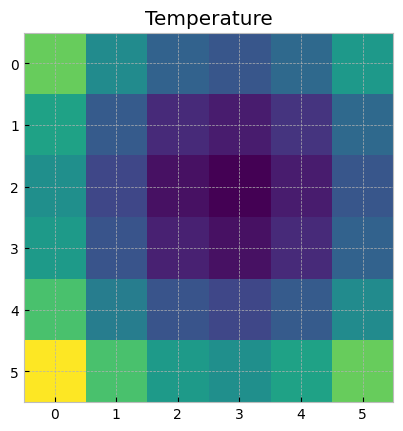

In [17]:
import matplotlib.pyplot as plt

Z1 =  np.abs(((X - 10) ** 2 + (Y - 10) ** 2) / 1 ** 2)
Z2 =  np.abs(((X + 10) ** 2 + (Y + 10) ** 2) / 2.5 ** 2)
Z =  (Z1 - Z2)

plt.imshow(Z)
plt.title("Temperature")
plt.show()

Note that `Z` contains no data on its location. Its just an array, the information stored in `x` and `y` aren’t associated with it at all.



### Creating a spatial data with `numpy` and `rasterio`

We need three components:

- An array of data and typically the xy coordinates
- A coordinate reference system which defines what coordinate space we are using (e.g. degrees or meters, where is the prime meridian etc)
- A transform defining the coordinate of the upper left hand corner and the cell resolution

Once we have those components, we can write a functional spatial raster dataset in Python in a few lines of code. We only need to provide the information mentioned above in a format that Rasterio understands.

In [ ]:
from rasterio.transform import Affine
import rasterio as rio, os

res = (x[-1] - x[0]) / 240.0
transform = Affine.translation(x[0] - res / 2, y[0] - res / 2) * Affine.scale(res, res)


master_dir = "./temp/"
if not os.path.exists(master_dir):
    os.makedirs(master_dir)

# open in 'write' mode, unpack profile info to dst
with rio.open(
    "./temp/new_raster.tif",
    "w",
    driver="GTiff",         # output file type
    height=Z.shape[0],      # shape of array
    width=Z.shape[1],
    count=1,                # number of bands
    dtype=Z.dtype,          # output datatype
    crs="+proj=latlong",    # CRS
    transform=transform,    # location and resolution of upper left cell
) as dst:
    # check for number of bands
    if dst.count == 1:
        # write single band
        dst.write(Z, 1)
    else:
        # write each band individually
        for band in range(len(Z)):
            # write data, band # (starting from 1)
            dst.write(Z[band], band + 1)

In [ ]:
os.listdir(master_dir)

['new_raster.tif', 'rgb_byte_local.tif']

## Vector Coordinate Reference Systems (CRS)

<!-- https://pygis.io/docs/d_vector_crs_intro.html#vector-coordinate-reference-systems-crs -->


Coordinate reference systems work well with points, lines, and polygons because each point or node has a specific set of coordinates (x, y). The challenge lies in understanding how these coordinates correspond to real-world locations on the ground.

When you create a point, line, or polygon, each point or node is defined by two coordinates, x and y. However, these coordinates can represent vastly different locations on the ground depending on the projection used. For example, the coordinate pair (0,0) could correspond to a location near Ghana in the WGS84 LatLon projection, or it could be in the middle of the Pacific Ocean under another projection.

Consider the example of a polygon with coordinates (0,45),(5,45),(5,40),(0,40). In the left panel, these coordinates are provided, but without a specified coordinate reference system, their actual locations are unknown. They could be anywhere, even in outer space. However, in the right panel, when we assign the WGS84 geographic lat lon projection (EPSG:4326), the coordinates suddenly become meaningful because we understand how they relate to real-world locations on the ground.


![Example of assigning a coordinate reference system](https://pygis.io/_images/d_crs_assigned.png)


Every time we create vector data (or receive it from someone else), we need to make sure that a projection is assigned to it.


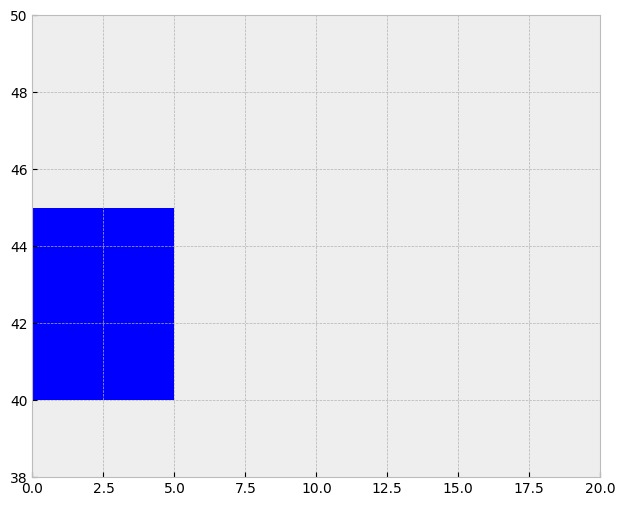

In [18]:
import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt

plt.style.use("bmh")

crs_latlong = "EPSG:4326"

a_square = {
    "name": ["Washington\n(38.90, -77.03)"],
    "geometry": [Polygon([Point(0, 45), Point(5, 45), Point(5, 40), Point(0, 40)])],
}

# create a dataframe from the nodes and assign the CRS
gdf_square = gpd.GeoDataFrame(a_square, crs=crs_latlong)
fig, ax = plt.subplots(figsize=(12, 6))
gdf_square.plot(ax=ax)
plt.ylim(38, 50)
plt.xlim(0, 20)
plt.show()

### ReProject Points, Lines, Polygons


When we need to change the projection of a dataset, we undergo a process called "reprojection." This involves converting coordinates (x, y) stored in latitude and longitude into another coordinate system using a set of formulas. It's a two-step process.

For instance, let's consider moving from the Sinosoidal projection to the Hobo-Dyer projection. First, we use the "inverse equation" to convert coordinate pairs from Sinosoidal back to latitude and longitude. Then, we use the forward equation to convert latitude and longitude into the Hobo-Dyer coordinate system.

![Reprojecting vectors](https://pygis.io/_images/d_reprojection_example.jpg)


We can use geopandas to move the prime meridian 10 degrees west

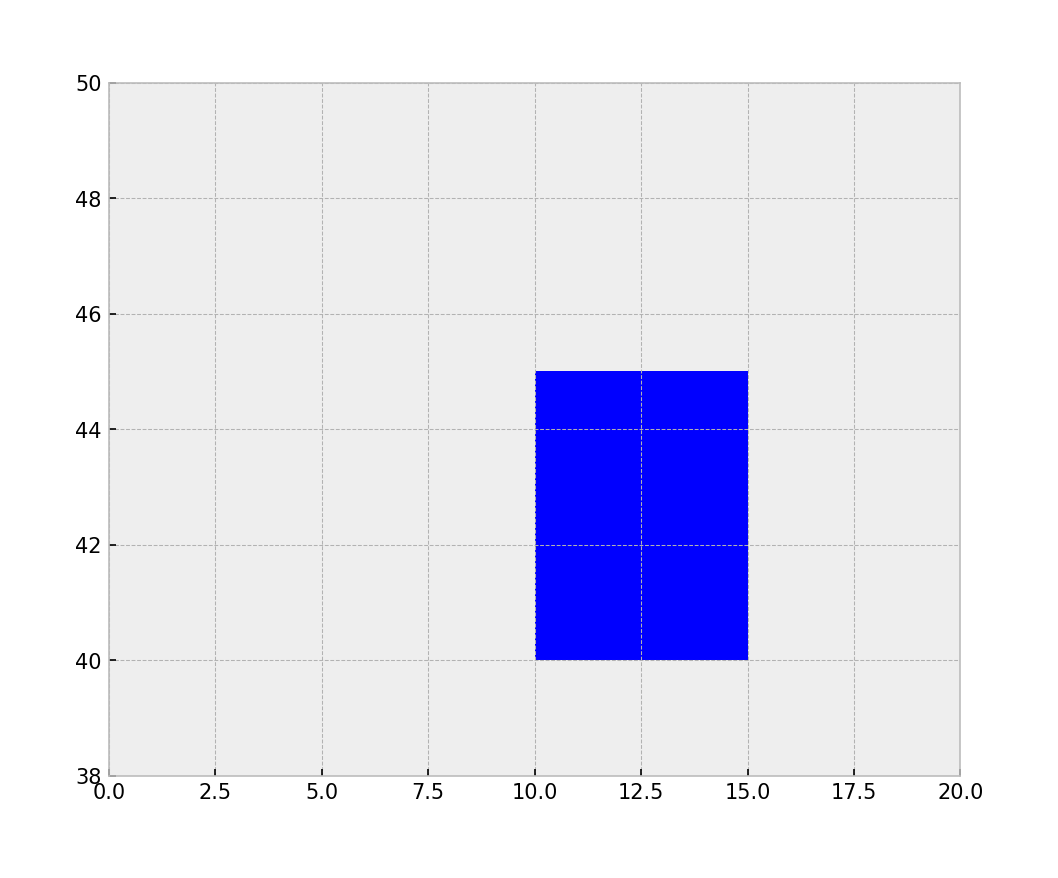

In [ ]:
# reproject the data
gdf_square_10w = gdf_square.to_crs("+proj=longlat +datum=WGS84 +lon_0=-10")

fig, ax = plt.subplots(figsize=(12, 6))
gdf_square_10w.plot(ax=ax)
plt.ylim(38, 50)
plt.xlim(0, 20)
plt.show()

### ReProject a Raster

### Reprojecting Raster Data with Rasterio

To reproject raster data using Rasterio, follow these steps:

1. Import the required libraries:
   
   ```python
   import numpy as np
   import rasterio
   from rasterio.warp import reproject, Resampling, calculate_default_transform
   ```

2. Define the destination CRS (Coordinate Reference System). For example, if you want to reproject to Web Mercator (EPSG:3857), set:
   
   ```python
   dst_crs = "EPSG:3857"
   ```

3. Specify the URL of the raster file you want to reproject:
   
   ```python
   url = "https://github.com/rasterio/rasterio/raw/main/tests/data/RGB.byte.tif"
   ```

4. Open the raster file using Rasterio:
   
   ```python
   with rasterio.open(url) as src:
   ```

5. Calculate the transform matrix for the output raster:
    
   ```python
       dst_transform, width, height = calculate_default_transform(
           src.crs,
           dst_crs,
           src.width,
           src.height,
           *src.bounds,
       )
   ```

6.  Set properties for the output raster:

   ```python
       dst_kwargs = src.meta.copy()
       dst_kwargs.update(
           {
               "crs": dst_crs,
               "transform": dst_transform,
               "width": width,
               "height": height,
               "nodata": 0,
           }
       )
   ```

7.  Create the output raster file and reproject each band:
   
   ```python
       with rasterio.open("./temp/rgb_byte_local.tif", "w", **dst_kwargs) as dst:
           for i in range(1, src.count + 1):
               reproject(
                   source=rasterio.band(src, i),
                   destination=rasterio.band(dst, i),
                   src_transform=src.transform,
                   src_crs=src.crs,
                   dst_transform=dst_transform,
                   dst_crs=dst_crs,
                   resampling=Resampling.nearest,
               )
   ```

In [19]:
import numpy as np
import rasterio
from rasterio.warp import reproject, Resampling, calculate_default_transform


dst_crs = "EPSG:3857"  # web mercator(ie google maps)

url = "https://github.com/rasterio/rasterio/raw/main/tests/data/RGB.byte.tif"

with rasterio.open(url) as src:
    src_transform = src.transform

    # calculate the transform matrix for the output
    dst_transform, width, height = calculate_default_transform(
        src.crs,
        dst_crs,
        src.width,
        src.height,
        *src.bounds,  # unpacks outer boundaries (left, bottom, right, top)
    )

    # set properties for output
    dst_kwargs = src.meta.copy()
    dst_kwargs.update(
        {
            "crs": dst_crs,
            "transform": dst_transform,
            "width": width,
            "height": height,
            "nodata": 0,  # replace 0 with np.nan
        }
    )

    with rasterio.open("./temp/rgb_byte_local.tif", "w", **dst_kwargs) as dst:
        for i in range(1, src.count + 1):
            reproject(
                source=rasterio.band(src, i),
                destination=rasterio.band(dst, i),
                src_transform=src.transform,
                src_crs=src.crs,
                dst_transform=dst_transform,
                dst_crs=dst_crs,
                resampling=Resampling.nearest,
            )

RasterioIOError: Attempt to create new tiff file './temp/rgb_byte_local.tif' failed: No such file or directory

## Plotting

To manipulate and visualize rasters, we can use two packages: `rasterio` and `geowombat`. The latter is a collection of utilities commonly used in GIS.

### geowowmbat

GeoWombat provides utilities to process geospatial and time series of raster data at scale. Easily process Landsat, Sentinel, Planetscope or RGB data and others.

Consult the [API reference](https://geowombat.readthedocs.io/en/latest/api.html)


#### Plot Example Data

In [20]:
import os

# Import GeoWombat
import geowombat as gw

# import plotting
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe

from geowombat.data import l8_224077_20200518_B2

fig, ax = plt.subplots(dpi=200)

with gw.open(l8_224077_20200518_B2,
                band_names=['blue']) as src:
    src.where(src != 0).sel(band='blue').plot.imshow(robust=True, ax=ax)
plt.tight_layout(pad=1)

ModuleNotFoundError: No module named 'geowombat'

#### Plot a local File

NameError: name 'gw' is not defined

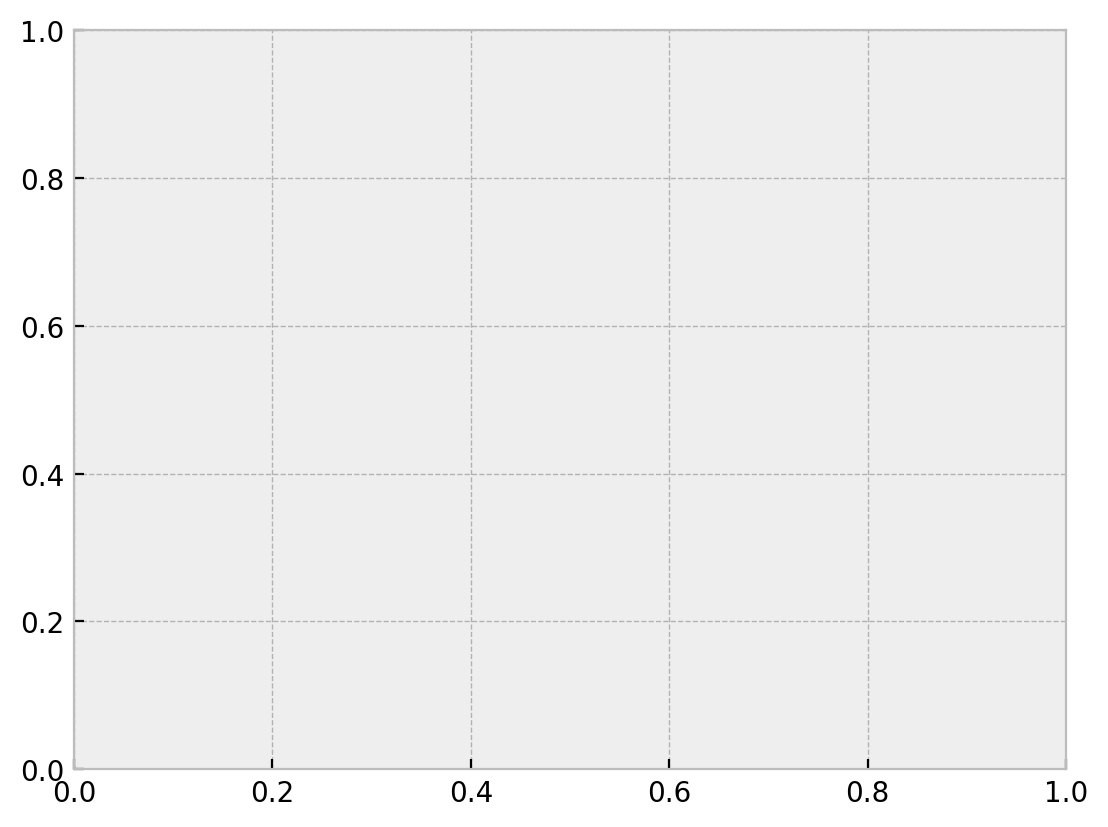

In [21]:
!wget -cq --show-progress "https://github.com/alexanderquispe/Diplomado_PUCP/raw/lecture14/Lecture_14/temp/LC08_20200518_webMC.tif"

fix, ax = plt.subplots(dpi=200)

with gw.open(
    "/content/LC08_20200518_webMC.tif",

) as src:
    src.where(src !=0).plot.imshow(robust=True, ax=ax)
plt.tight_layout(pad=1)

### Rasterio

You can use the base library, and there's also a wealth of documentation and help available on forums.

More in [rasterio documentation](https://rasterio.readthedocs.io/en/stable/topics/reading.html)

#### Plot Everything

<!-- https://pygis.io/docs/f_rs_plot.html -->

Original Projection

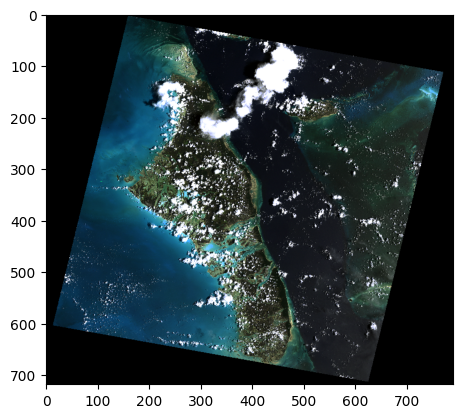

<Axes: >

In [6]:
from rasterio.plot import show

src = rasterio.open(url)
show(src.read())

#### Plot single Band

Reproject

In [22]:
from rasterio.plot import show

src = rasterio.open("./temp/rgb_byte_local.tif")
show(src.read(2), transform=src.transform, cmap="viridis")  # 2 : Second band

RasterioIOError: ./temp/rgb_byte_local.tif: No such file or directory

## Editing Rasters and Remotely Sensed Data

<!-- configuration for docker: https://pygis.io/docs/b_conda_started.html#the-easy-way -->

<!-- https://pygis.io/docs/f_rs_edit.html#editing-rasters-and-remotely-sensed-data -->

In this part of the content, we'll utilize `geowombat` as it provides simplicity in handling raster data.


### Delete NAS

The code to filter the raster is `src.where(src != 0)`, which can be used as follows:


In [25]:
import geowombat as gw
from geowombat.data import l8_224078_20200518

# Zeros are replaced with nans
with gw.open(l8_224078_20200518) as src:
    data = src.where(src != 0)

ModuleNotFoundError: No module named 'geowombat'

### Setting  `no data` values

To define missing data values, we can use the configuration manager within the open method parameter like with `gw.open(raster, nodata=0)`. To use it, we'll define `0` as `NA`.

In [24]:
import geowombat as gw
from geowombat.data import l8_224078_20200518

# Zeros are replaced with nans
with gw.open(l8_224078_20200518, nodata=0) as src:
    print('gw.open: ',src.attrs['nodatavals'])
    #  replace 0 with nan
    src=src.gw.mask_nodata()


# Zeros are replaced with nans
with gw.config.update(nodata=0):
  with gw.open(l8_224078_20200518) as src:
    print('gw.config',src.attrs['nodatavals'])
    #  replace 0 with nan
    src=src.gw.mask_nodata()

ModuleNotFoundError: No module named 'geowombat'

### Mutate values

Similar to pandas, we can use the `.replace({old_value: new_value})` method to replace values.

In [ ]:
import geowombat as gw
from geowombat.data import l8_224078_20200518

# Replace 1 with 10
with gw.open(l8_224078_20200518) as src:
    data = src.gw.replace({1: 10})

o update values, we can use `{algorithm}(src)`  within the `with` statement identifier.


In [ ]:
import geowombat as gw
from geowombat.data import l8_224078_20200518

# Replace 1 with 10
with gw.open(l8_224078_20200518) as src:
    data = src * 0.001 + 80
    print(data[0].values)

[[80.    80.    80.    ... 80.    80.    80.   ]
 [80.    80.    80.    ... 80.    80.    80.   ]
 [80.    80.    80.    ... 80.    80.    80.   ]
 ...
 [87.692 87.518 87.513 ... 87.44  87.432 87.415]
 [87.586 87.59  87.61  ... 87.44  87.411 87.425]
 [87.576 87.743 87.77  ... 87.464 87.443 87.406]]


<!-- ## Remote Sensing Coordinate Reference Systems -->

<!-- https://pygis.io/docs/f_rs_crs.html#remote-sensing-coordinate-reference-systems -->

## Handle Multiple Remotely Sensed Images

Combining raster files can sometimes be tedious, but with the utilities of `geowombat`, this can be relatively easy, considering that both rasters must match in the `crs`.

### Raster Union

To join 2 rasters or images, we can use the `mosaic=True` parameter within the `with` statement, and to overlap and merge them, we can use `overlap: string['mean', 'min', 'max']='mean'`. For clarity, we'll use `band_names=['blue']`.


In [ ]:
# Import GeoWombat
import geowombat as gw

# import plotting
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe

# load data
from geowombat.data import l8_224077_20200518_B2, l8_224078_20200518_B2

First, let's plot the rasters we have

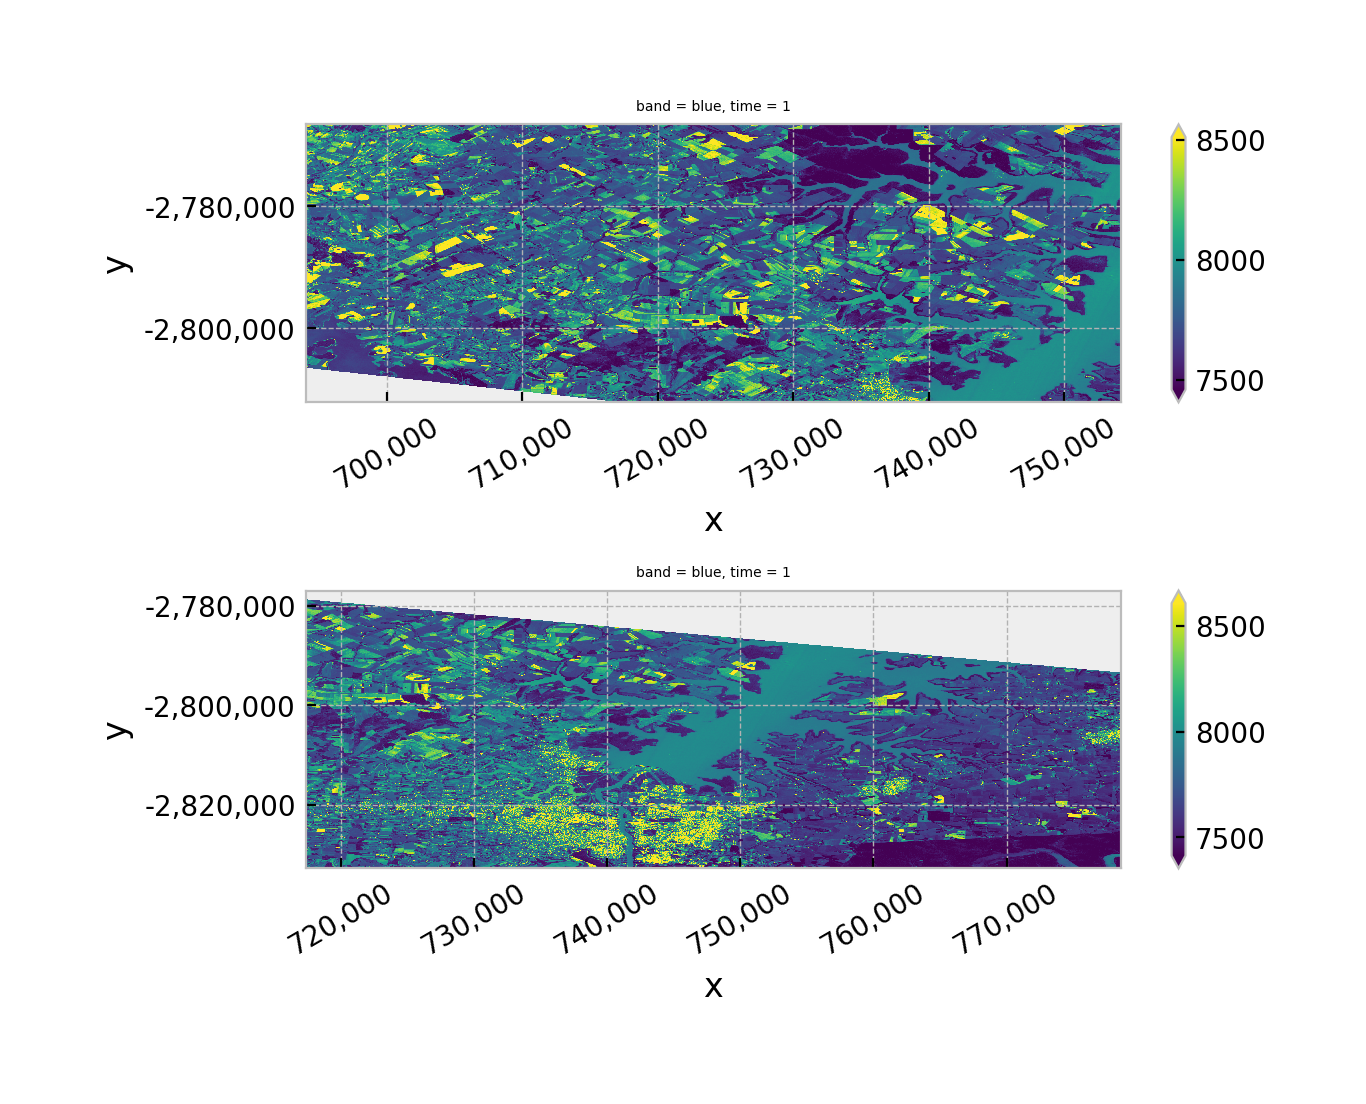

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, dpi=200)

with gw.open(
     [l8_224077_20200518_B2],
     band_names=['blue'],

 ) as src:
     src.where(src != 0).sel(band='blue').gw.imshow(robust=True, ax=ax1)

plt.tight_layout(pad=1)

with gw.open(
     [l8_224078_20200518_B2],
     band_names=['blue'],

 ) as src:
     src.where(src != 0).sel(band='blue').gw.imshow(robust=True, ax=ax2)

plt.tight_layout(pad=1)

Note that the rasters have missing data. To join the 2 rasters, we can use the following syntax:

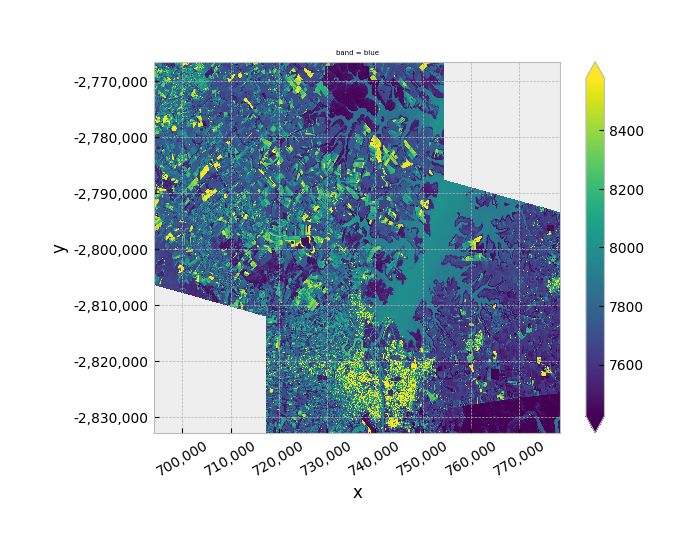

In [ ]:
fix, ax = plt.subplots(dpi=100)
with gw.open(
    [l8_224077_20200518_B2, l8_224078_20200518_B2],  # images, o raster path
    band_names=["blue"],  # band
    mosaic=True,
    bounds_by="union",
) as src:
    (
        src.where(src != 0)# dropna
        .sel(band="blue")
        .gw.imshow(robust=True, ax=ax)  # band = blue
    )

plt.tight_layout(pad=1)  # show img

### Raster Intersection
<!-- https://pygis.io/docs/f_rs_extraction.html#raster-data-extraction -->

From the previous exercise, we see that we complete the 2 rasters with `bounds_by='union'` to obtain the raster that both share. We can use the parameter `bounds_by='intersection'` while keeping all other parameters the same.

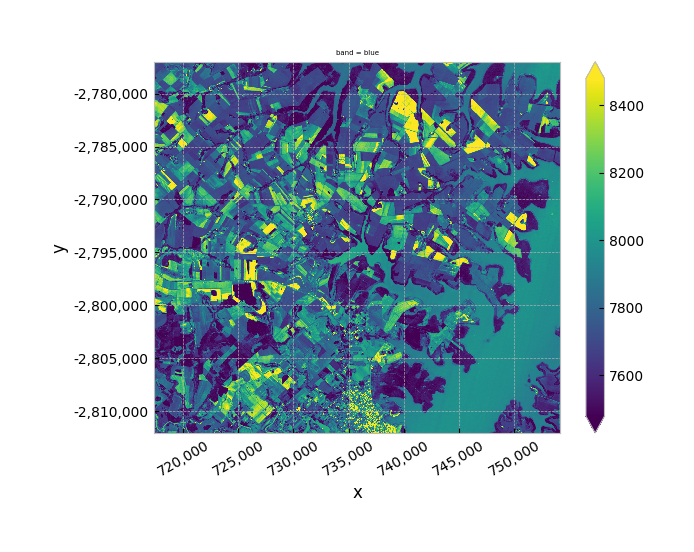

In [ ]:
fix, ax = plt.subplots(dpi=100)
with gw.open(
    [l8_224077_20200518_B2, l8_224078_20200518_B2],  # images, o raster path
    band_names=["blue"],  # band
    mosaic=True,
    bounds_by="intersection",
) as src:
    (
        src.where(src != 0)  # dropna
        .sel(band="blue")
        .gw.imshow(robust=True, ax=ax)  # band = blue
    )

plt.tight_layout(pad=1)  # show img

## Raster Data Extraction


Raster data is often of little use unless we can extract and summarize the data. For instance, extracting raster to points by coordinates allows us to pass data to machine learning models for land cover classification or cloud masking.

In order to extract data, `geowombat` requires two elements: the raster containing the information and the coordinates from which data is to be obtained. It's crucial that both the raster and the coordinates share the same coordinate reference system (CRS), or else they need to be reprojected to align.

To illustrate this, let's use some sample coordinates:

In [ ]:
# Import data and packages
import geowombat as gw
from geowombat.data import l8_224078_20200518

# Coordinates in latitude/longitude
lat, lon = -25.50142964, -54.39756038

with gw.open(l8_224078_20200518) as src:
    # Transform the coordinates to map units
    x, y = gw.lonlat_to_xy(lon, lat, src)
    # Transform the map coordinates to data indices
    j, i = gw.coords_to_indices(x, y, src)
    data = src[:, i, j].data.compute()

print(data.flatten())

[7448 6882 6090]


For a more generalized approach, we can use `gw.extract(point_coordinates)`, which returns a GeoPandas DataFrame. In the following example, `l8_224078_20200518_points` is a `'.gpkg'` file containing point coordinates, and df is a `GeoDataFrame`.

In [ ]:
import geowombat as gw
from geowombat.data import l8_224078_20200518, l8_224078_20200518_points

with gw.open(l8_224078_20200518) as src:
    df = src.gw.extract(l8_224078_20200518_points)

print(df)

        name                         geometry  id     1     2     3
0      water  POINT (741522.314 -2811204.698)   0  7966  7326  6254
1       crop  POINT (736140.845 -2806478.364)   1  8030  7490  8080
2       tree  POINT (745919.508 -2805168.579)   2  7561  6874  6106
3  developed  POINT (739056.735 -2811710.662)   3  8302  8202  8111
4      water  POINT (737802.183 -2818016.412)   4  8277  7982  7341
5       tree  POINT (759209.443 -2828566.230)   5  7398  6711  6007


In case we have a `GeoDataFrame` rather than a '.gpkg' file, we can use the following syntax. This involves having the dataframe (points in this case), transforming the CRS to match both the raster and the GeoDataFrame, and then extracting the values.


In [ ]:
import geowombat as gw
from geowombat.data import l8_224078_20200518, l8_224078_20200518_points
import geopandas as gpd

point_df = gpd.read_file(l8_224078_20200518_points) #geoDataFrame
print(point_df.crs)

# Transform the CRS to WGS84 lat/lon
point_df = point_df.to_crs('epsg:4326')
print(point_df.crs)

# Extract data
with gw.open(l8_224078_20200518) as src:
    df = src.gw.extract(point_df)

print(df)

EPSG:32621
epsg:4326
        name                         geometry  id     1     2     3
0      water  POINT (741522.314 -2811204.698)   0  7966  7326  6254
1       crop  POINT (736140.845 -2806478.364)   1  8030  7490  8080
2       tree  POINT (745919.508 -2805168.579)   2  7561  6874  6106
3  developed  POINT (739056.735 -2811710.662)   3  8302  8202  8111
4      water  POINT (737802.183 -2818016.412)   4  8277  7982  7341
5       tree  POINT (759209.443 -2828566.230)   5  7398  6711  6007


If we have a dataset with coordinates that are not points but rather a shapefile, we can use the same previous syntax.

In [ ]:
from geowombat.data import l8_224078_20200518, l8_224078_20200518_polygons

# with gw.config.update(sensor='bgr'):
with gw.open(l8_224078_20200518) as src:
    df = src.gw.extract(l8_224078_20200518_polygons)

print(df.head())

   id  point                         geometry   name     1     2     3
0   0      0  POINT (737559.502 -2795247.772)  water  7994  7423  6272
1   0      1  POINT (737589.502 -2795247.772)  water  8017  7428  6292
2   0      2  POINT (737619.502 -2795247.772)  water  8008  7446  6292
3   0      3  POINT (737649.502 -2795247.772)  water  8008  7412  6291
4   0      4  POINT (737679.502 -2795247.772)  water  8018  7398  6250


<Axes: >

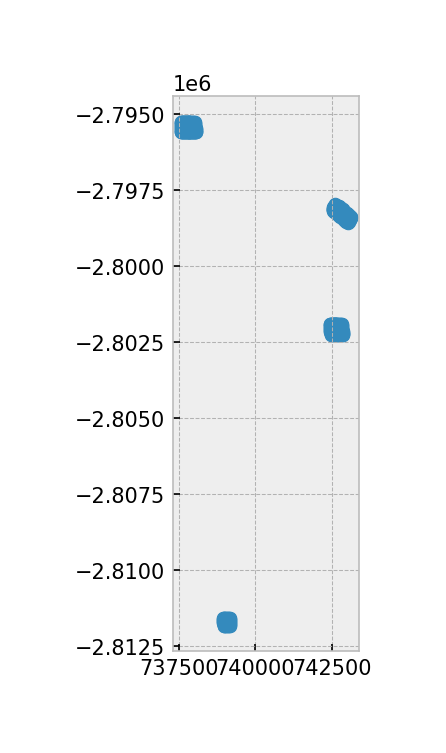

In [ ]:
df.plot()

The previous plot might not be clear, so let's filter the data to focus on a specific shapefile, where each pixel is represented by a value in the GeoDataFrame.

<Axes: >

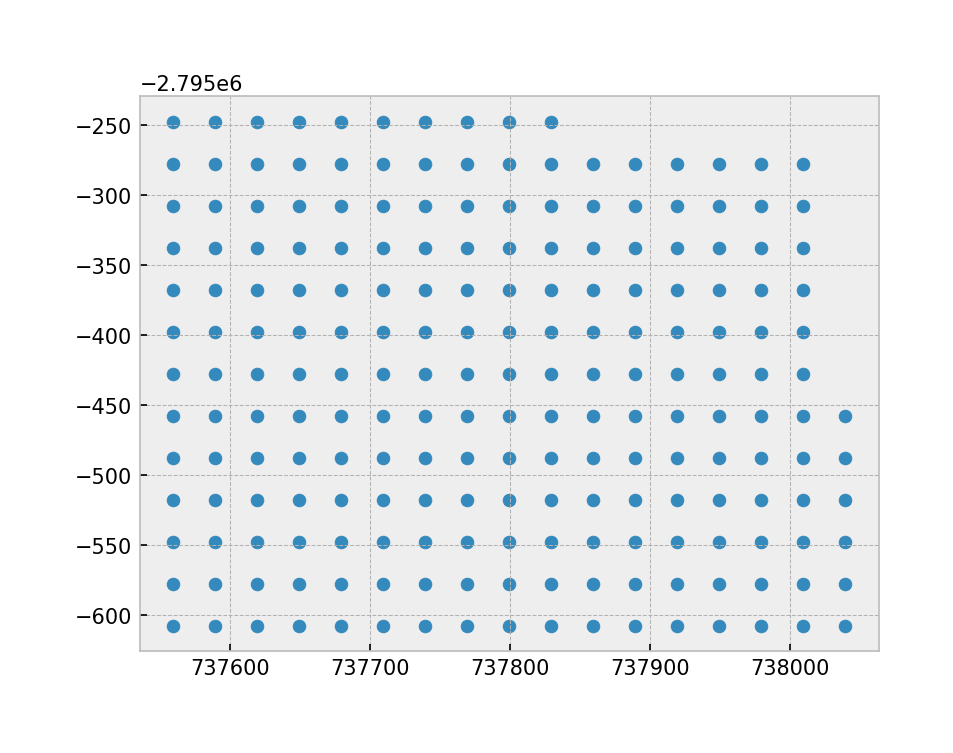

In [ ]:
df.query("name == 'water'").plot()

## Spatial Prediction using ML in Python

<!-- https://pygis.io/docs/f_rs_ml_predict.html#spatial-prediction-using-ml-in-python -->



### Land Use Classification using Geowombat & Sklearn

Creating land cover classification is a common task for remotely sensed data. In this tutorial, we'll demonstrate how to train a machine learning (ML) model using raster data. These methods heavily rely on the `sklearn_xarray` package. For understanding the pipeline commands, please refer to their documentation and [examples](https://scikit-learn.org/stable/auto_examples/index.html#pipelines-and-composite-estimators).

#### Supervised Classification in Python

In the following example, we'll utilize Landsat data and some training data to train a supervised `sklearn` model. The initial step involves having land classifications for a set of points or polygons. For instance, we have three polygons with the classes ['water', 'crop', 'tree', 'developed']. The first step is to use `LabelEncoder` to convert these classes into integer-based categories, stored in a new column called 'lc'.

In [ ]:
import geowombat as gw
from geowombat.data import l8_224078_20200518, l8_224078_20200518_polygons
from geowombat.ml import fit, predict, fit_predict
import geopandas as gpd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB

le = LabelEncoder()

# The labels are string names, so here we convert them to integers
labels = gpd.read_file(l8_224078_20200518_polygons)
labels["lc"] = le.fit(labels.name).transform(labels.name)
print(labels)

        name                                           geometry  lc
0      water  POLYGON ((737544.502 -2795232.772, 737544.502 ...   3
1       crop  POLYGON ((742517.658 -2798160.232, 743046.717 ...   0
2       tree  POLYGON ((742435.360 -2801875.403, 742458.874 ...   2
3  developed  POLYGON ((738903.667 -2811573.845, 738926.586 ...   1


After converting the labels, we'll generate our `sklearn` pipeline, which includes normalization, principal component analysis (PCA) for dimensionality reduction, and a Gaussian Naive Bayes classifier.

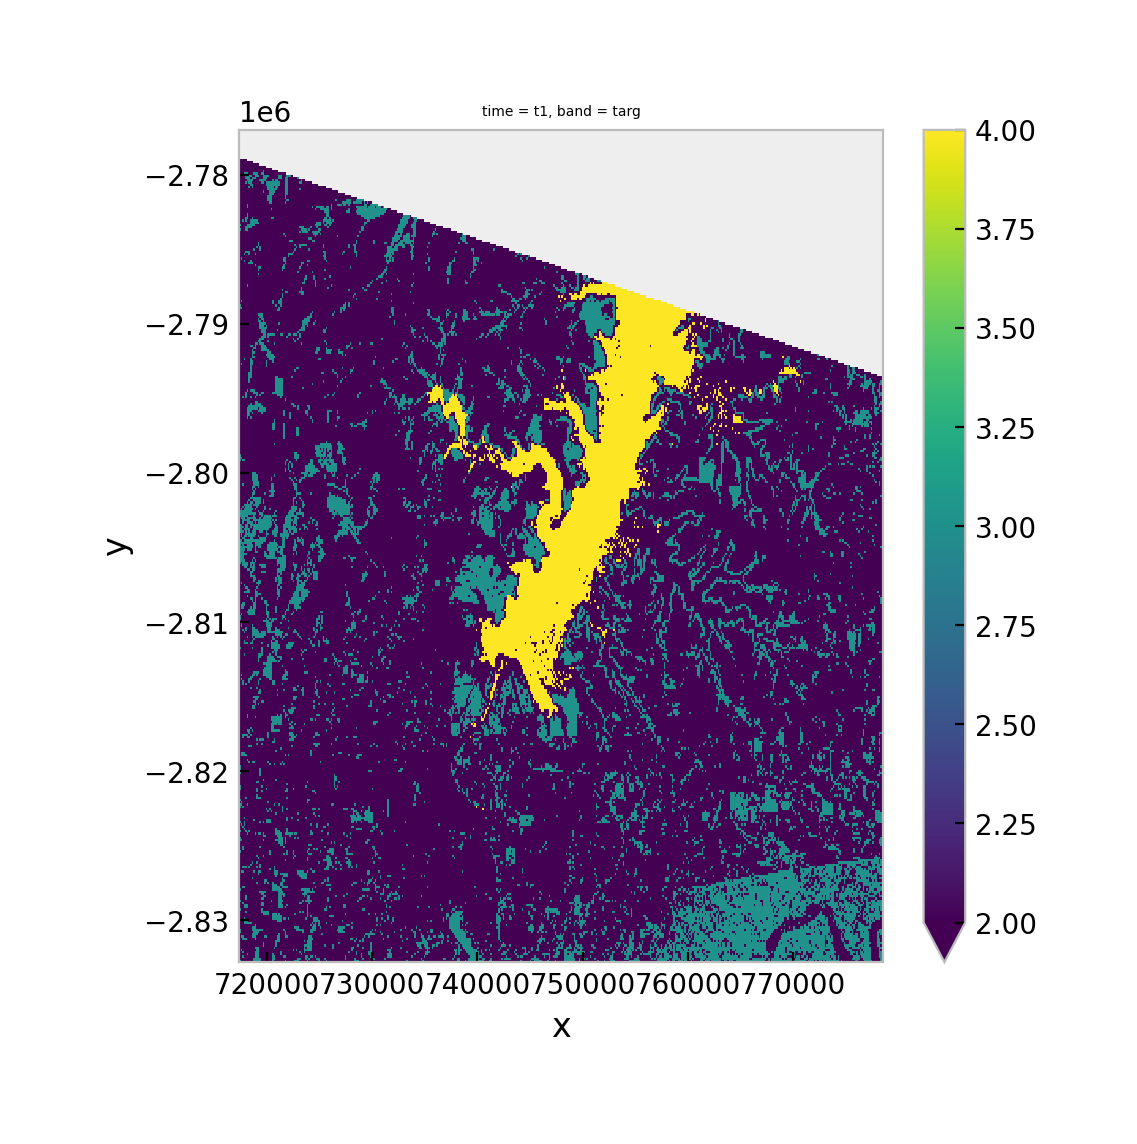

In [ ]:
import matplotlib.pyplot as plt

# Use a data pipeline
pl = Pipeline([('scaler', StandardScaler()),
               ('pca', PCA()),
               ('clf', GaussianNB())])

fig, ax = plt.subplots(dpi=200, figsize=(5, 5))

# Fit the classifier
with gw.config.update(ref_res=150):
    with gw.open(l8_224078_20200518, nodata=0) as src:
        X, Xy, clf = fit(src, pl, labels, col="lc")
        y = predict(src, X, clf)
        y.plot(robust=True, ax=ax)
plt.tight_layout(pad=1)

Alternatively, to fit and predict the model in one step, we use `fit_predict`:

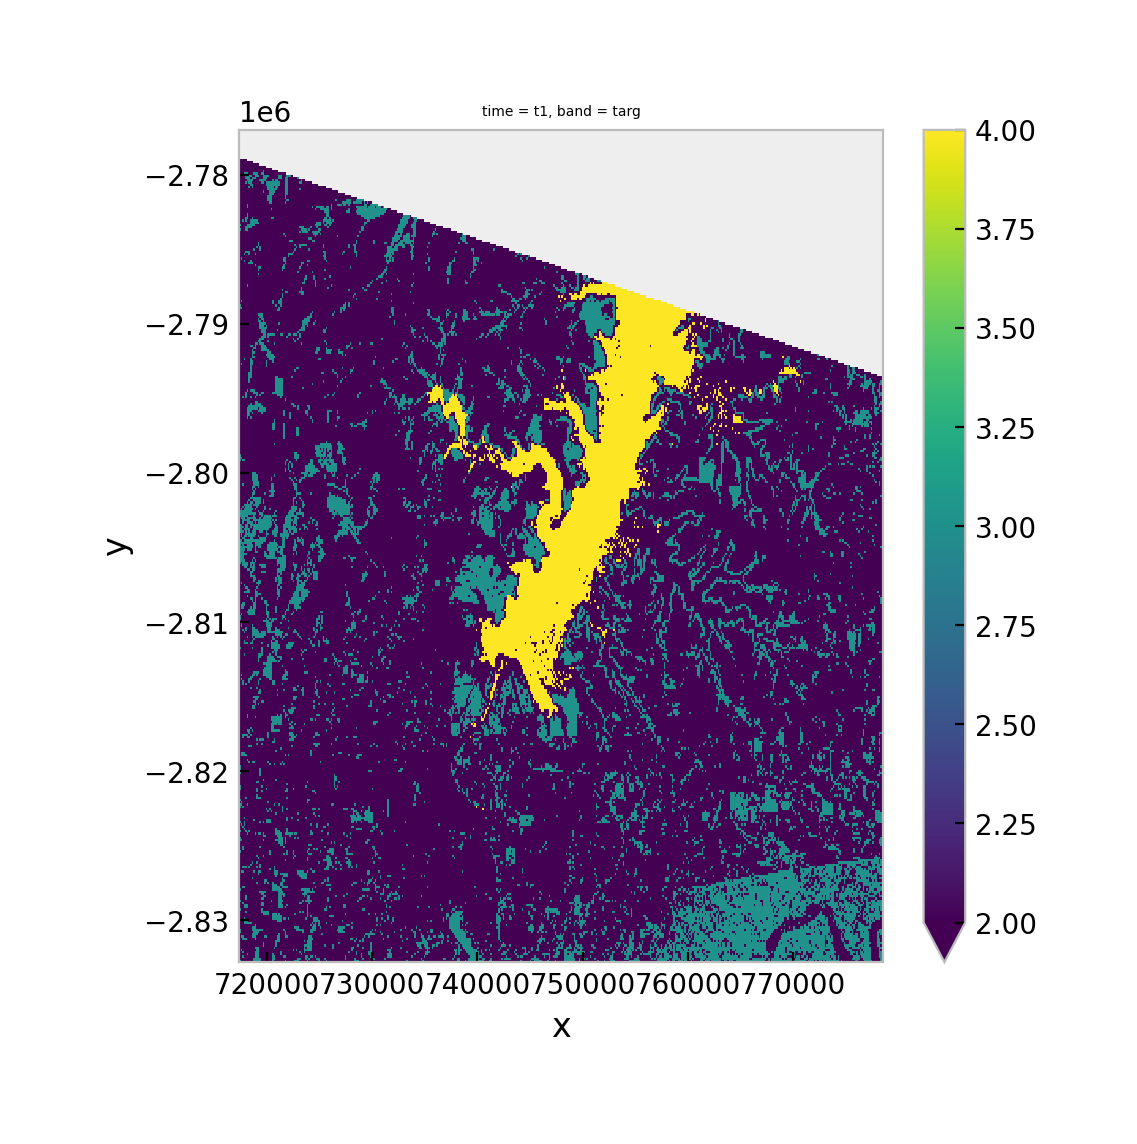

In [ ]:
from geowombat.ml import fit_predict
fig, ax = plt.subplots(dpi=200, figsize=(5, 5))

with gw.config.update(ref_res=150):
    with gw.open(l8_224078_20200518, nodata=0) as src:
        y = fit_predict(src, pl, labels, col='lc')
        y.plot(robust=True, ax=ax)
plt.tight_layout(pad=1)

#### Unsupervised Classification in Python

Unsupervised classification takes a different approach. Here, we don’t provide examples of different land cover types. Instead, we rely on the algorithm to identify distinct clusters of similar data and apply a unique label to each cluster. For example, water and trees will look very different in terms of their reflectance properties. Water reflects more blue and absorbs all the near-infrared, while trees reflect little blue and a lot of near-infrared.

Therefore, water and trees should cluster together when plotted based on their different reflectances. These clusters will be assigned a unique value to each pixel (e.g., water = 1 and trees = 2), and later, the end user will need to assign the label to each numbered cluster (e.g., water = 1, trees = 2).


In this example, we'll use KMeans to perform clustering. We need to decide beforehand how many clusters we want to identify. Typically, it's recommended to roughly double the number of expected classes and then recombine them later into the desired labels. This helps in better understanding and categorizing the variation in your image.

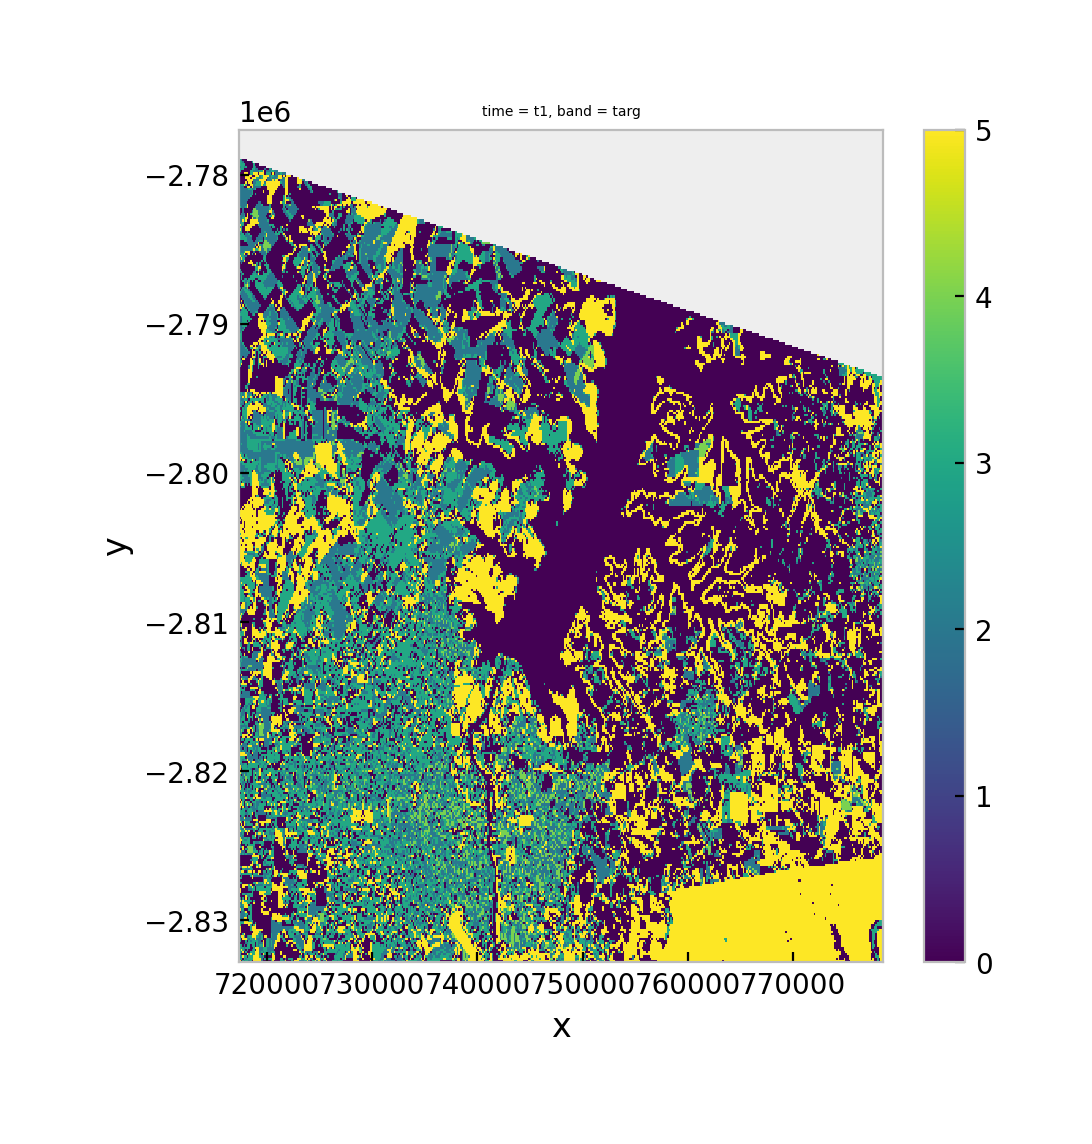

In [ ]:
from sklearn.cluster import KMeans

cl = Pipeline([('clf', KMeans(n_clusters=6, random_state=0))])

fig, ax = plt.subplots(dpi=200, figsize=(5, 5))

# Fit_predict unsupervised classifier
with gw.config.update(ref_res=150):
    with gw.open(l8_224078_20200518, nodata=0) as src:
        y = fit_predict(src, cl)
        y.plot(robust=True, ax=ax)
plt.tight_layout(pad=1)

In this case, we can observe that it effectively labels different clusters of data, and now it's up to us to determine which clusters should be categorized as water, trees, fields, etc.

### Spatial Prediction with Time Series Stack

When working with a stack of time series data, applying the same method as described previously is straightforward. However, we need to open multiple images, set `stack_dim` to 'time', and specify the `time_names`. Below, we're pretending to have two dates of Landsat imagery.

<xarray.DataArray (time: 2, band: 1, y: 372, x: 408)>
dask.array<xarray-<this-array>, shape=(2, 1, 372, 408), dtype=float64, chunksize=(2, 1, 256, 256), chunktype=numpy.ndarray>
Coordinates:
  * x        (x) float64 7.174e+05 7.176e+05 7.177e+05 ... 7.783e+05 7.785e+05
  * y        (y) float64 -2.777e+06 -2.777e+06 ... -2.833e+06 -2.833e+06
  * time     (time) object 't1' 't2'
    targ     (time, y, x) uint8 dask.array<chunksize=(2, 256, 256), meta=np.ndarray>
  * band     (band) <U4 'targ'
Attributes: (12/13)
    transform:           (150.0, 0.0, 717345.0, 0.0, -150.0, -2776995.0)
    crs:                 32621
    res:                 (150.0, 150.0)
    is_tiled:            0
    nodatavals:          (0, 0, 0)
    _FillValue:          0
    ...                  ...
    offsets:             (0.0, 0.0, 0.0)
    filename:            ['LC08_L1TP_224078_20200518_20200518_01_RT.TIF', 'LC...
    resampling:          nearest
    AREA_OR_POINT:       Area
    _data_are_separate:  1
    _data_

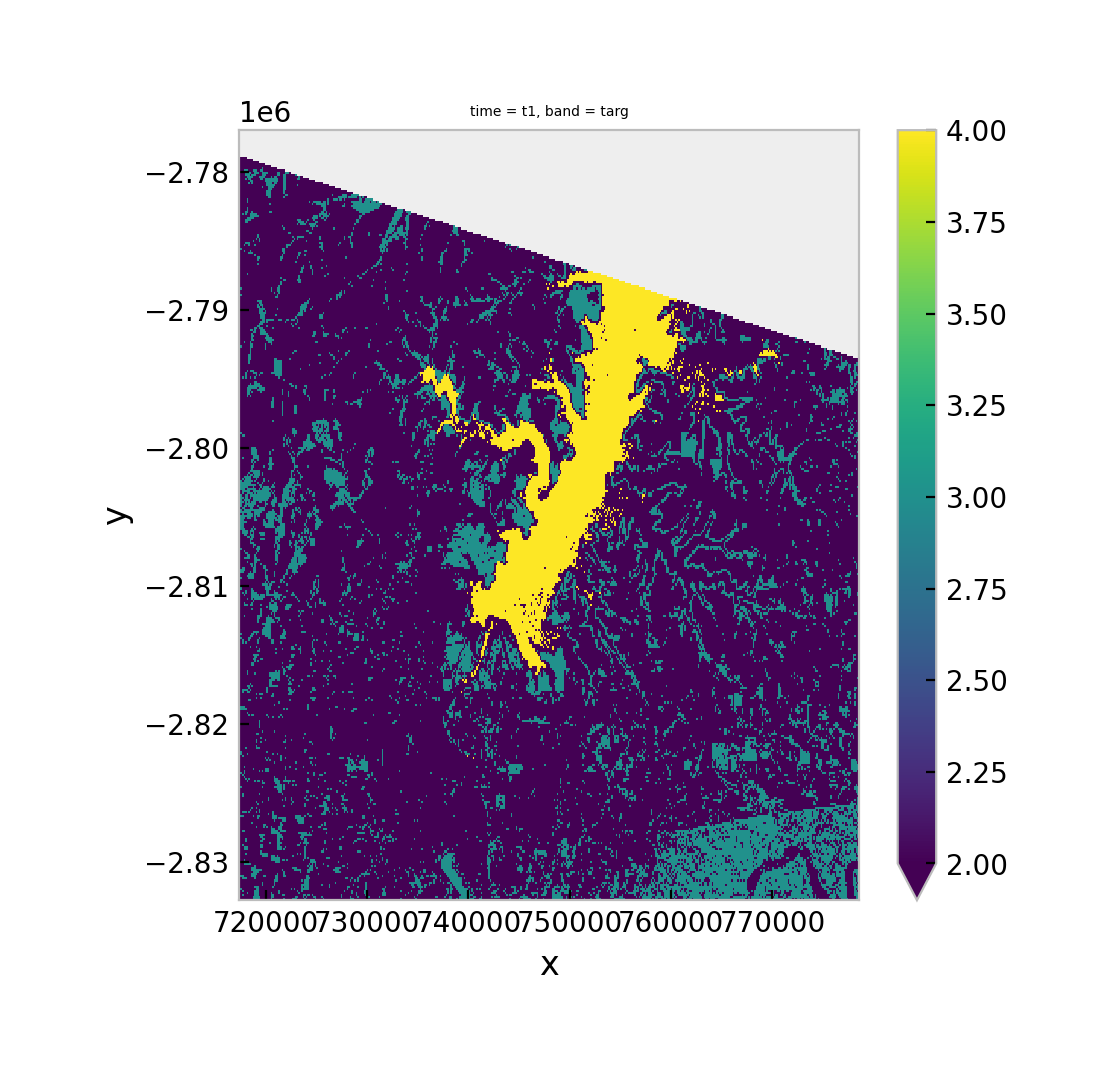

In [ ]:
fig, ax = plt.subplots(dpi=200, figsize=(5, 5))

with gw.config.update(ref_res=150):
    with gw.open(
        [l8_224078_20200518, l8_224078_20200518],
        time_names=["t1", "t2"],
        stack_dim="time",
        nodata=0,
    ) as src:
        y = fit_predict(src, pl, labels, col="lc")
        print(y)
        # plot one time period prediction
        y.sel(time="t1").plot(robust=True, ax=ax)

The above code performs spatial prediction with a time series stack. It opens multiple images, sets the stack dimension to 'time', and specifies the time names. After fitting and predicting the model, it plots the prediction for one time period.

If you want to perform more sophisticated model tuning using sklearn, you can break up your fit and predict steps as follows:

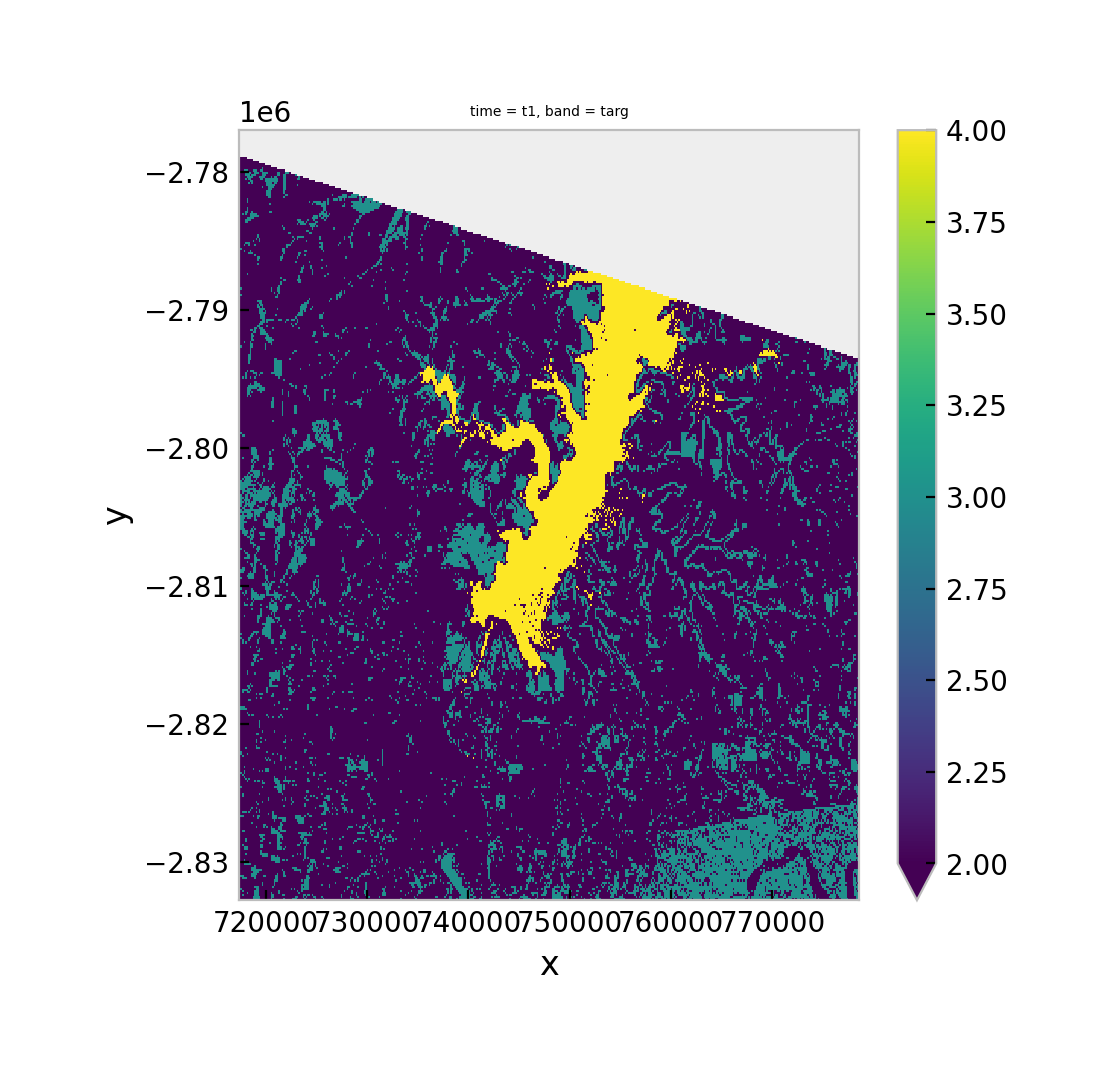

In [ ]:
fig, ax = plt.subplots(dpi=200, figsize=(5, 5))

with gw.config.update(ref_res=150):
    with gw.open(l8_224078_20200518, nodata=0) as src:
        X, Xy, clf = fit(src, pl, labels, col="lc")
        y = predict(src, X, clf)
        y.plot(robust=True, ax=ax)

This code demonstrates how to perform model tuning using sklearn. It fits the model, makes predictions, and plots the results.

### Evaluating Model Performance and Hyperparameter Tuning

Assessing model performance is crucial for successfully building a model. Sklearn provides various built-in tools for this purpose. One common method is k-fold cross-validation, where the data is divided into independent sets of training and testing data multiple times. This allows us to assess the model's ability to predict outcomes on unseen data.

In this scenario, we'll use the supervised classification pipeline `pl` from earlier and perform cross-validation using k-fold. To use k-fold with Geowombat, we need to employ `CrossValidatorWrapper`, as shown in the example below, to work with xarray objects.

Hyperparameter tuning is also essential. For example, we may need to determine the number of PCA components or experiment with scaling the data range using `StandardScaler`. To perform hyperparameter tuning with `GridSearchCV` in a pipeline, we need to set up the parameter grid. Here's an example:

In [ ]:
pl = Pipeline([("scaler", StandardScaler()), ("pca", PCA()), ("clf", GaussianNB())])

param_grid = {"scaler__with_std": [True, False], "pca__n_components": [1, 2, 3]}

In the `param_grid` dictionary, each step in the pipeline is labeled (e.g., 'scaler', 'pca', 'clf'). We reference these steps by name to try out different parameters for each step. For instance, `"pca__n_components": [1, 2, 3]` indicates that we'll experiment with three different values for the `n_components` parameter in the PCA step to choose the one that best predicts our testing data.


{'mean_fit_time': array([0.07076793, 0.07019916, 0.0696094 , 0.07055416, 0.07109795,
       0.06804976]), 'std_fit_time': array([0.00295957, 0.00482442, 0.00089711, 0.00409909, 0.00386188,
       0.00177566]), 'mean_score_time': array([0.04438338, 0.04261255, 0.04310861, 0.04232316, 0.04329433,
       0.04423923]), 'std_score_time': array([0.00134477, 0.00067893, 0.0010121 , 0.00109625, 0.00140596,
       0.00306635]), 'param_pca__n_components': masked_array(data=[1, 1, 2, 2, 3, 3],
             mask=[False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_scaler__with_std': masked_array(data=[True, False, True, False, True, False],
             mask=[False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'pca__n_components': 1, 'scaler__with_std': True}, {'pca__n_components': 1, 'scaler__with_std': False}, {'pca__n_components': 2, 'scaler__with_std': True}, {'pca__n_components': 2, 'scaler__w

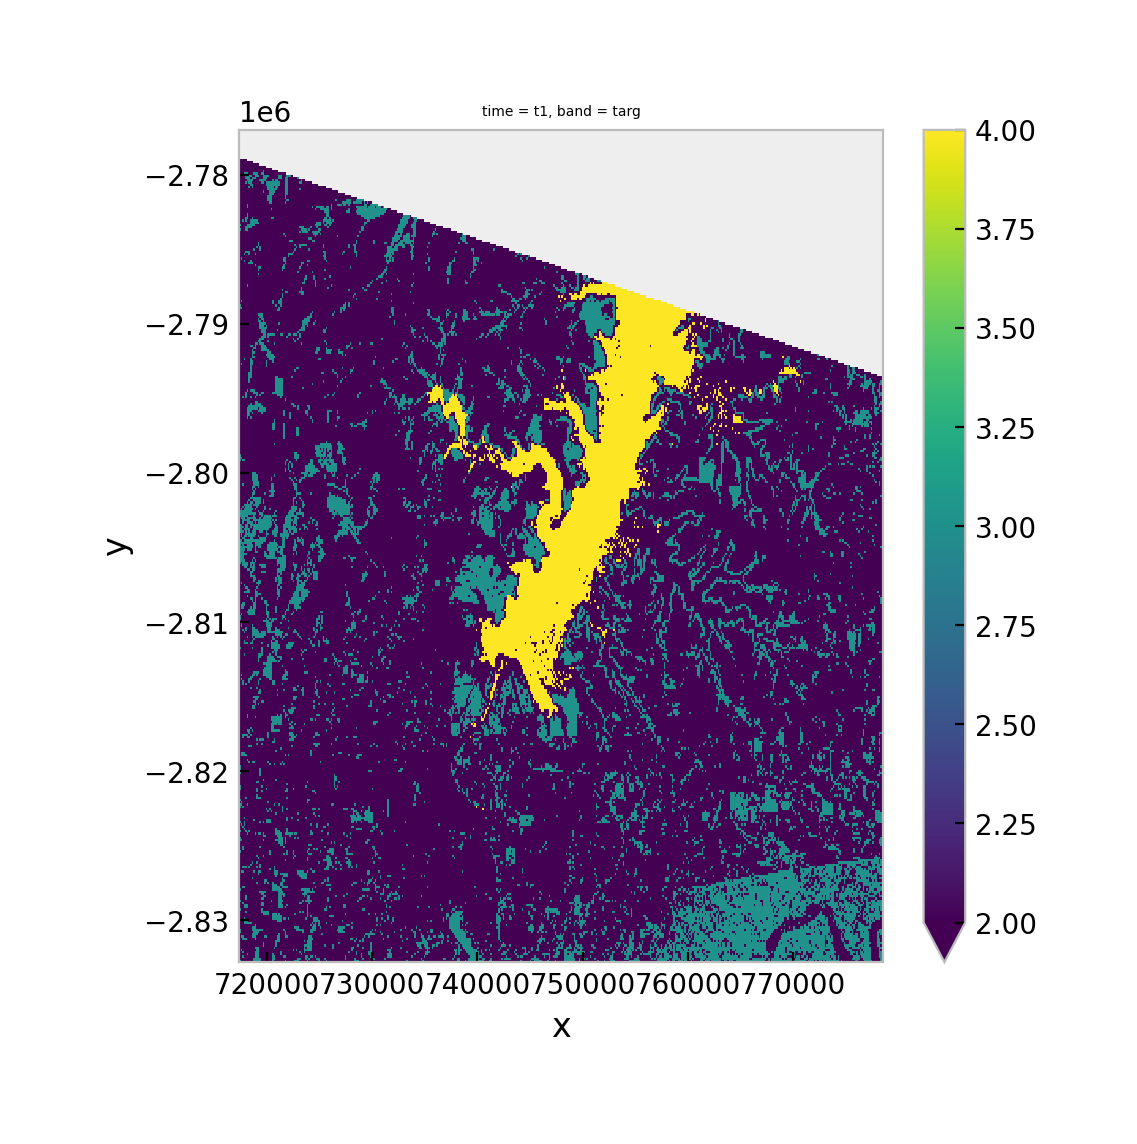

In [ ]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn_xarray.model_selection import CrossValidatorWrapper

pl = Pipeline([('scaler', StandardScaler()),
               ('pca', PCA()),
               ('clf', GaussianNB())])

cv = CrossValidatorWrapper(KFold())
gridsearch = GridSearchCV(pl, cv=cv, scoring='balanced_accuracy',
                    param_grid={
                      "scaler__with_std":[True,False],
                      "pca__n_components": [1, 2, 3]
                      })

fig, ax = plt.subplots(dpi=200,figsize=(5,5))

with gw.config.update(ref_res=150):
    with gw.open(l8_224078_20200518, nodata=0) as src:
        # fit a model to get Xy used to train model
        X, Xy, pipe = fit(src, pl, labels, col="lc")

        # fit cross valiation and parameter tuning
        # NOTE: must unpack * object Xy
        gridsearch.fit(*Xy)
        print(gridsearch.cv_results_)
        print(gridsearch.best_score_)
        print(gridsearch.best_params_)

        # get set tuned parameters and make the prediction
        # Note: predict(gridsearch.best_model_) not currently supported
        pipe.set_params(**gridsearch.best_params_)
        y = predict(src, X, pipe)
        y.plot(robust=True, ax=ax)
plt.tight_layout(pad=1)

In order to create a model with the optimal parameters we need to use `gridsearch.best_params_`, which holds a dictionary of each parameter and its optimal value. To `use` these values we need to update the parameters held in our returned pipeline, pipe, by using the `.set_params` method.